In [1]:
# Reading the Patient Feature and Id file
import json

with open('Data/Final_Datasets/Total_Patients_Personal_Details_Features_File.txt') as data_file:    
    patient_data = json.load(data_file)   # yaml.safe_loads produces strings rather than unicode strings as in json.load

with open('Data/Final_Datasets/Selected_Patient_Id.txt') as data_file:    
    patient_id = json.load(data_file)   # yaml.safe_loads produces strings rather than unicode strings as in json.load
    
print len(patient_data)
print len(patient_id)
print "Loading Files Done"

8011
8011
Loading Files Done


In [2]:
# Total Evaluations for Datasets

total_eval_count = 0
for patient in patient_data.keys():
    for drug in patient_data[patient]["Treatments List"].keys():
            total_eval_count = total_eval_count + 1

print "Total Number of evaluations",
print total_eval_count

Total Number of evaluations 42075


In [3]:
# Checking is still some case of no Side Effect being mentioned
for patient in patient_data.keys():
    for drug in patient_data[patient]["Treatments List"].keys():
        if patient_data[patient]["Treatments List"][drug]["Side Effects"] == -1:
            print "You are Screwed"

print "Done with the Test"

Done with the Test


In [ ]:
# Checking shape and evaluations for the librec files

import pandas as pd

dataframe = pd.read_csv("Data/Final_Datasets/Librec Side Effects Rating.txt", sep = ' ')       
print "Length of Rating File"
print dataframe.shape

with open('Data/Final_Datasets/Librec_Side_Effects_Data.txt') as data_file:    
    patient_data = json.load(data_file)   # yaml.safe_loads produces strings rather than unicode strings as in json.load

print "Length of Side Effect File"
print len(patient_data)

count = 0
for patient in patient_data:
    for drug in patient_data[patient].keys():
        count =count + 1

print "Total evaluations in Side Effect File"
print count

In [4]:
# Generating some statistics for features

other_condition = []
primary_condition = []
location = []
age =[]
gender = []
purpose =[]
side_effect = []

for patient in patient_data.keys():
    
    # Primary Conditions
    feature = patient_data[patient]["Primary Condition"]
    if feature !=-1:
        if feature not in primary_condition:  
            primary_condition.append(feature)
            
    # Location
    feature = patient_data[patient]["Location"]
    if feature !=-1:
        if feature not in location:  
            location.append(feature)
    
    # Other Conditions
    feature = patient_data[patient]["Other conditions"]
    if feature !=-1:
        for item in feature:
            if item not in other_condition:  
                other_condition.append(item)
    # Age            
    feature = patient_data[patient]["Age"]
    if feature !=-1:
        if feature not in age:  
            age.append(feature)
    
    # Gender        
    feature = patient_data[patient]["Gender"]
    if feature !=-1:
        if feature not in gender:  
            gender.append(feature)
    
    # Purpose and Side Effect
    for drug in patient_data[patient]["Treatments List"].keys():
        
        feature = patient_data[patient]["Treatments List"][drug]["Purpose"]
        if feature not in purpose:
            purpose.append(feature)
                
        feature = patient_data[patient]["Treatments List"][drug]["Side Effects"]
        for item in feature:
            if item not in side_effect:
                side_effect.append(item)
                    
print len(primary_condition)
print len(other_condition)
print len(location)
print len(age)
print len(gender)
print len(purpose)
print len(side_effect)

434
1675
3602
6
3
2169
2813


2813


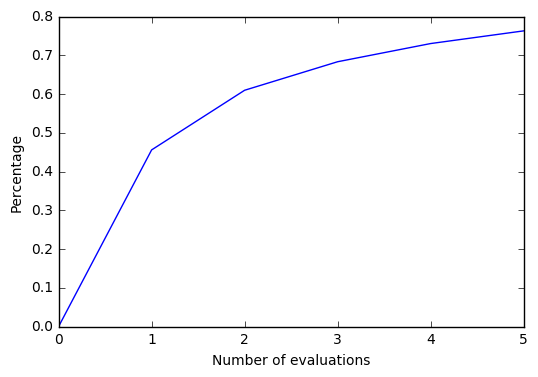

In [22]:
# Plotting the Cumulative Frequency Plot

import numpy as np

print len(side_effect_dict)
X = [0,1,2,3,4,5]
Y= []
for item in X:
    cf =0 
    for key in side_effect_dict.keys():
        if side_effect_dict[key] <= item:
            cf =cf + 1
    cf = float(cf)/ len(side_effect_dict.keys())
    Y.append(cf)
    
plt.xlabel("Number of evaluations")
plt.ylabel("Percentage")
plt.plot(X,Y)
plt.show()    

# Plotting the top-K Side Effects
import numpy as np

print len(side_effect_dict.keys())
y_values =  sorted(side_effect_dict.values())
plt.plot(y_values)
plt.ylim([0,50])
plt.show()

y_values = np.array(y_values)
y_values = y_values[ y_values > 50]
print len(y_values)

# Plotting the histogram

plt.hist(side_effect_dict.values(), bins=[0,10,20,30,40,50,100,200,500,1000])
#plt.ylim([0,500])
plt.ylabel('Frequency')
plt.xlabel('Number of Evaluations')
plt.title('Side Effects')
plt.show()